In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load FER-2013 CSV
data = pd.read_csv("fer2013.csv")

In [3]:
# Step 2: Preprocess
pixels = data['pixels'].tolist()
faces = np.array([np.fromstring(pixel, sep=' ') for pixel in pixels], dtype='float32')
faces = faces.reshape(-1, 48, 48, 1)
faces /= 255.0

emotions = to_categorical(data['emotion'], num_classes=7)

In [4]:
# Step 3: Train-test split
x_train, x_test, y_train, y_test = train_test_split(faces, emotions, test_size=0.2, random_state=42)

In [5]:
# Step 4: Build Model
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Step 5: Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Step 6: Train
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 308s 655ms/step - accuracy: 0.2723 - loss: 2.3554 - val_accuracy: 0.1838 - val_loss: 2.0002
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 311s 641ms/step - accuracy: 0.4028 - loss: 1.5235 - val_accuracy: 0.4338 - val_loss: 1.4620
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 285s 634ms/step - accuracy: 0.4473 - loss: 1.4357 - val_accuracy: 0.4547 - val_loss: 1.4027
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 279s 620ms/step - accuracy: 0.4721 - loss: 1.3677 - val_accuracy: 0.4971 - val_loss: 1.3363
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 300s 669ms/step - accuracy: 0.4958 - loss: 1.3162 - val_accuracy: 0.4494 - val_loss: 1.4047
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 278s 618ms/step - accuracy: 0.5049 - loss: 1.2952 - val_accuracy: 0.5060 - val_loss: 1.3160
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 321s 616ms/step - accuracy: 0.5273 - loss: 1.2378 - val_accuracy: 0.4253 - val_loss: 1.7030
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 316s 602ms/step - accuracy: 0.5478 -

In [8]:
# Step 7: Save model
model.save("emotion_model.h5")

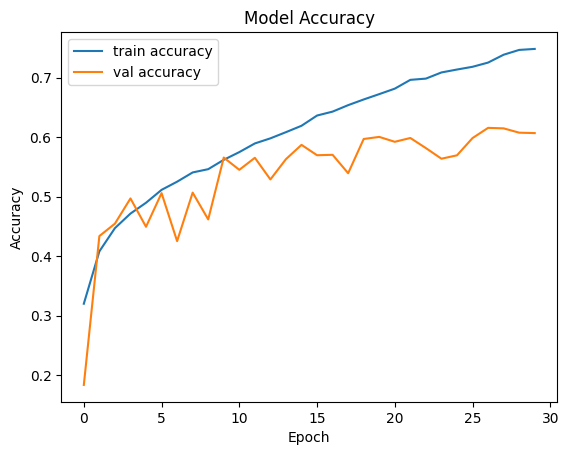

In [9]:
# Optional: Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()